# Not sure what this is yet, so depending on results will change title
- Both the institute rankings and the UKRI spending is imported from the github repository.
- Initially the UKRI spending is summed by "Supplier" to find the total grants given to each institution.
- An initial investigation into this data vs the rankings is run before some scikit-learn models are used to ???
- A Neural Network approach would not be valid with such a small dataset.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
github_data_url = "https://github.com/md12g12/ML_UK_university_funding_project/blob/main/final_df.csv?raw=true"

uni_df = pd.read_csv(github_data_url, index_col=[0])

In [193]:
uni_df.head()

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
oxford,1000,200,NaN,3.34,0.87,2842,599,99.1,10.1,90.4,84.7,2.734851e+08
cambridge,989,205,NaN,3.33,0.95,2718,1043,99.1,11.4,90.0,86.0,2.288673e+08
school economics and political science,963,177,3.98,3.35,0.85,2051,853,96.5,12.4,90.6,83.3,3.923843e+07
st andrews,947,208,4.30,3.13,0.82,2650,746,95.7,11.1,79.9,79.6,1.328509e+07
imperial,895,194,3.99,3.36,0.92,2982,755,97.5,11.1,95.1,86.7,1.611291e+08


### NaN's
- Replace NaNs using nearest neighbour imputation as scores are generally clustered. (The funding column is omitted as it is the target feature and the distribution is not known.)

In [262]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="distance")
imputed_values = imputer.fit_transform(uni_df.drop(['Amount'], axis=1))
model_data = pd.DataFrame(imputed_values, index=uni_df.index,  columns=uni_df.drop(["Amount"], axis=1).columns)
model_data["Amount"] = uni_df["Amount"]
model_data.dropna(inplace=True)

In [206]:
model_data.head()

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
oxford,1000.0,200.0,4.054083,3.34,0.87,2842.0,599.0,99.1,10.1,90.4,84.7,2.734851e+08
cambridge,989.0,205.0,4.062915,3.33,0.95,2718.0,1043.0,99.1,11.4,90.0,86.0,2.288673e+08
school economics and political science,963.0,177.0,3.980000,3.35,0.85,2051.0,853.0,96.5,12.4,90.6,83.3,3.923843e+07
st andrews,947.0,208.0,4.300000,3.13,0.82,2650.0,746.0,95.7,11.1,79.9,79.6,1.328509e+07
imperial,895.0,194.0,3.990000,3.36,0.92,2982.0,755.0,97.5,11.1,95.1,86.7,1.611291e+08


In [210]:
total = model_data['Amount'].sum()
print("Total grants awarded in 2022 = £", f"{np.round(total):,}")

Total grants awarded in 2022 = £ 3,384,888,591.0


In [211]:
no_of_institutes = 10
top_grants = model_data[0:no_of_institutes]["Amount"].sum()
print("Total grants to the top", no_of_institutes, "institutes = £", f"{np.round(top_grants):,}",":", np.round((top_grants/total)*100), "% of the total value awarded")

Total grants to the top 10 institutes = £ 1,196,473,009.0 : 35.0 % of the total value awarded


Top 10% of institutions account for 35% of the grants awarded suggesting an exponential distribution.

Text(0.5, 1.0, 'Cumulitive grant distribution')

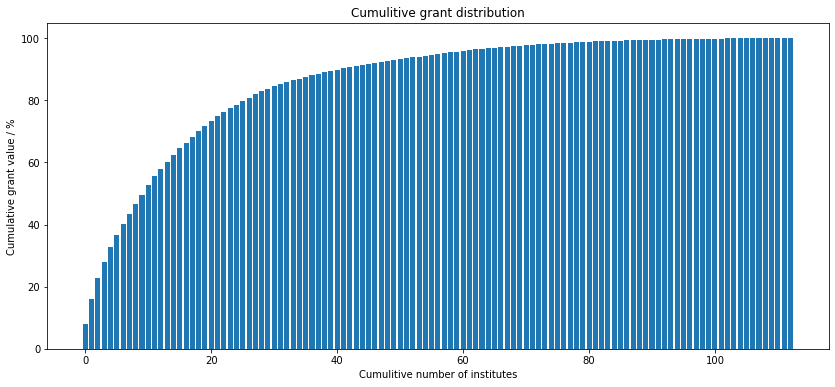

In [224]:
plt.figure(figsize=(14, 6))
plt.bar(np.arange(0, len(model_data.index)), model_data['Amount'].sort_values(ascending=False).cumsum()/total*100)
plt.ylabel("Cumulative grant value / %")
plt.xlabel("Cumulitive number of institutes")
plt.title("Cumulitive grant distribution")

# Plotting grant value vs total score,  an aggregate of all the other scores

Text(0.5, 1.0, 'Overall score vs grant value')

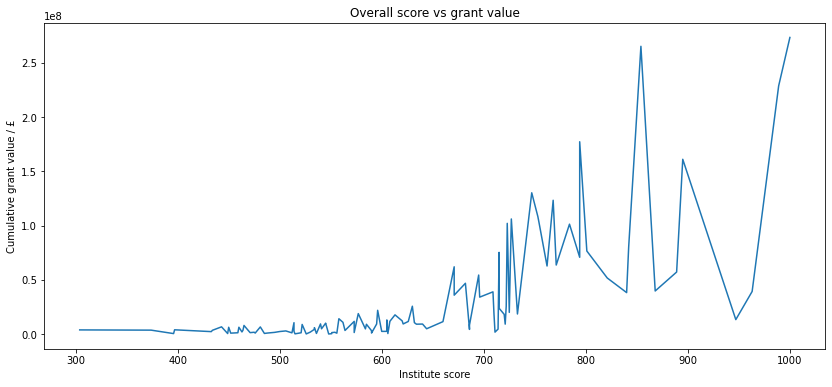

In [270]:
plt.figure(figsize=(14, 6))
plt.plot(model_data["Overall score"], model_data['Amount'])
plt.ylabel("Cumulative grant value / £")
plt.xlabel("Institute score")
plt.title("Overall score vs grant value")

Obvious correlation between score and grant valu, however quite noisy. You could fit with an exponential, however would be a poor model. Will be used to compare to ML methods later.

In [269]:
model_data.corr()


,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
Overall score,1.000000,0.830395,-0.048085,0.791632,0.786027,0.464568,0.309395,0.860164,-0.739297,0.778188,0.637087,0.692222
Entry standards,0.830395,1.000000,-0.025228,0.661894,0.662392,0.375319,0.044269,0.687244,-0.517294,0.699312,0.539226,0.634056
Student satisfaction,-0.048085,-0.025228,1.000000,-0.344004,-0.244334,-0.182484,0.061939,-0.103081,0.076510,-0.225550,-0.150424,-0.210969
Research quality,0.791632,0.661894,-0.344004,1.000000,0.753589,0.398224,0.120818,0.643021,-0.543658,0.659321,0.430653,0.578435
Research intensity,0.786027,0.662392,-0.244334,0.753589,1.000000,0.320625,0.255144,0.667069,-0.526707,0.663537,0.470625,0.598534
Academic services spend,0.464568,0.375319,-0.182484,0.398224,0.320625,1.000000,0.028073,0.273375,-0.464846,0.286751,0.199192,0.484833
Facilities spend,0.309395,0.044269,0.061939,0.120818,0.255144,0.028073,1.000000,0.202390,-0.129627,0.173368,0.276751,0.050622
Degree completion,0.860164,0.687244,-0.103081,0.643021,0.667069,0.273375,0.202390,1.000000,-0.625222,0.708796,0.624710,0.592201
Student -staff ratio,-0.739297,-0.517294,0.076510,-0.543658,-0.526707,-0.464846,-0.129627,-0.625222,1.000000,-0.446725,-0.359070,-0.561956
Graduate prospects – outcomes,0.778188,0.699312,-0.225550,0.659321,0.663537,0.286751,0.173368,0.708796,-0.446725,1.000000,0.899597,0.638724


<AxesSubplot:>

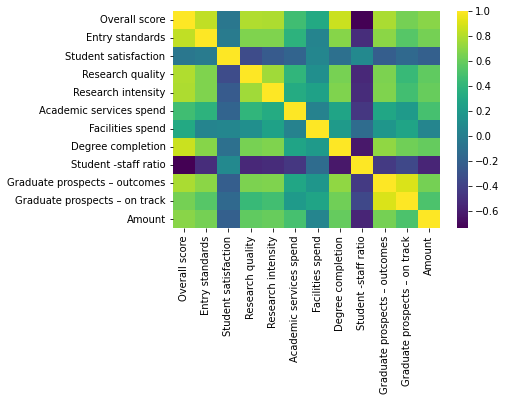

In [253]:
sns.heatmap(model_data.corr(), cmap="viridis")

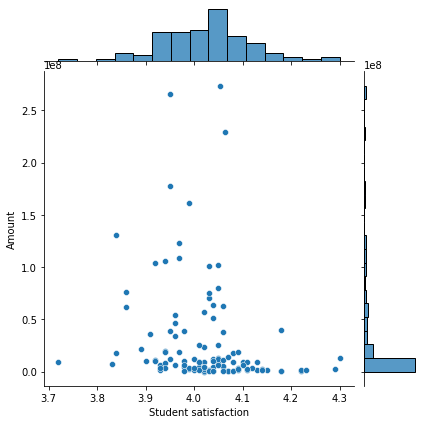

In [267]:
sns.jointplot(x=model_data["Student satisfaction"], y=model_data["Amount"])

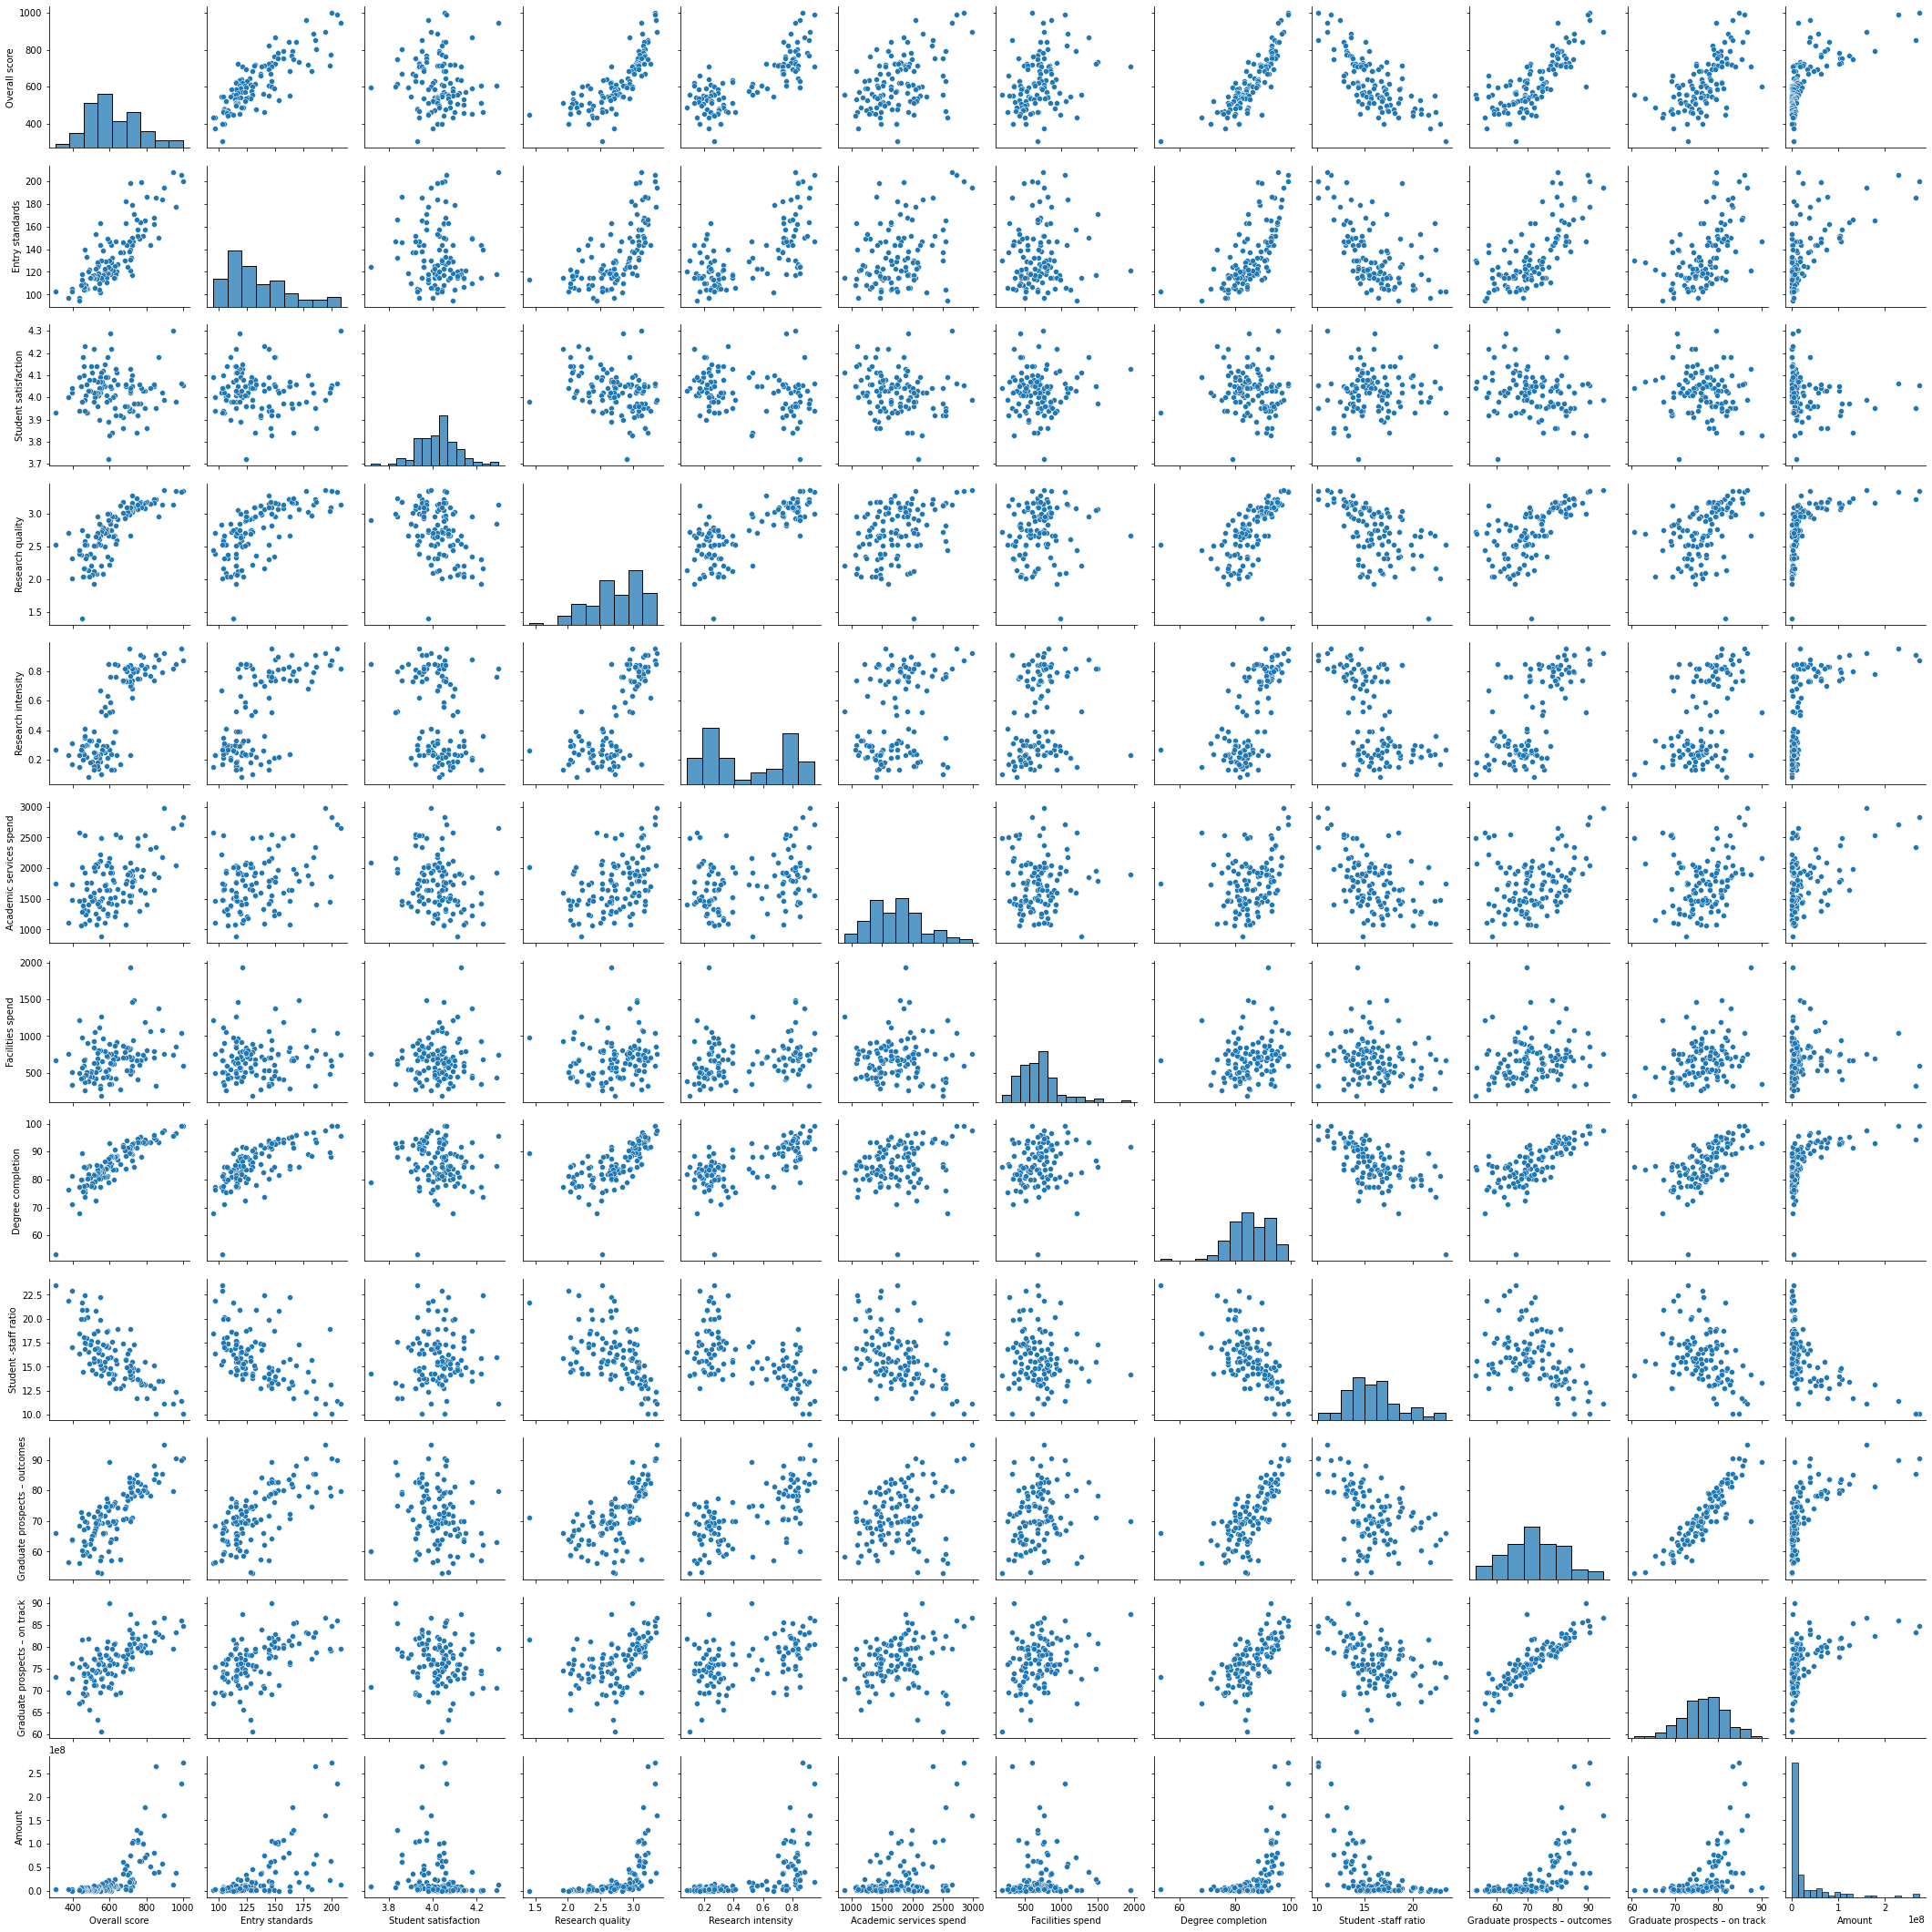

In [268]:
sns.pairplot(model_data)

In [251]:
model_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Overall score,113.0,6.209469e+02,1.405445e+02,304.00,521.00,599.00,715.00,1.000000e+03
Entry standards,113.0,1.343274e+02,2.679800e+01,95.00,115.00,126.00,149.00,2.080000e+02
Student satisfaction,113.0,4.026168e+00,9.300077e-02,3.72,3.97,4.03,4.07,4.300000e+00
Research quality,113.0,2.730442e+00,3.941387e-01,1.40,2.51,2.74,3.06,3.360000e+00
Research intensity,113.0,4.950442e-01,2.791445e-01,0.08,0.24,0.39,0.78,9.500000e-01
Academic services spend,113.0,1.749690e+03,4.289448e+02,884.00,1448.00,1729.00,2011.00,2.982000e+03
Facilities spend,113.0,6.933805e+02,2.781958e+02,189.00,505.00,683.00,808.00,1.939000e+03
Degree completion,113.0,8.556549e+01,7.217548e+00,53.10,81.00,85.00,91.30,9.910000e+01
Student -staff ratio,113.0,1.592124e+01,2.752286e+00,10.10,14.20,15.50,17.30,2.350000e+01
Graduate prospects – outcomes,113.0,7.201770e+01,9.008361e+00,53.10,66.00,71.00,79.00,9.510000e+01


Student-staff ratio has a negative correlation as expected as the lower this value the better. The student satisfaction shows little correlation, and has a very low standard deviation, with there being little difference between institutions. Will be removed in improve models accuracy. 

In [257]:
model_data['Student satisfaction']

oxford                                    4.054083
cambridge                                 4.062915
school economics and political science    3.980000
st andrews                                4.300000
imperial                                  3.990000
                                            ...   
metropolitan                              4.090000
wolverhampton                             4.020000
leeds trinity                             4.040000
east                                      4.000000
bedfordshire                              3.930000
Name: Student satisfaction, Length: 113, dtype: float64

In [258]:
model_data.drop(["Student satisfaction"], inplace=True, axis=1)

In [260]:
model_data.head()

,Overall score,Entry standards,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
oxford,1000.0,200.0,3.34,0.87,2842.0,599.0,99.1,10.1,90.4,84.7,2.734851e+08
cambridge,989.0,205.0,3.33,0.95,2718.0,1043.0,99.1,11.4,90.0,86.0,2.288673e+08
school economics and political science,963.0,177.0,3.35,0.85,2051.0,853.0,96.5,12.4,90.6,83.3,3.923843e+07
st andrews,947.0,208.0,3.13,0.82,2650.0,746.0,95.7,11.1,79.9,79.6,1.328509e+07
imperial,895.0,194.0,3.36,0.92,2982.0,755.0,97.5,11.1,95.1,86.7,1.611291e+08


# Finding common entries between the university ranking table, and the UKRI funding data

# using scikit learn to predict UKRI funding from performance metrics

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA#
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("final_df.csv", index_col=False)
df.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)
df.set_index(["Name"], inplace=True)
df

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
Name,,,,,,,,,,,,
aberdeen,686,182,4.06,2.97,0.73,1744,701,88.5,15.7,74.8,77.2,1.601820e+07
abertay,463,140,4.23,2.16,0.36,1093,686,73.6,22.4,62.2,70.6,2.788469e+06
aberystwyth,605,118,4.29,2.84,0.76,1932,435,85.0,16.0,63.0,70.5,7.159019e+06
anglia ruskin,443,108,4.05,2.37,0.27,1064,420,79.8,20.0,72.8,77.2,1.804805e+07
arts bournemouth,606,144,4.22,2.30,0.13,1424,347,88.4,14.3,57.1,73.9,6.109208e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
winchester,471,108,4.01,2.32,0.30,1239,465,84.3,17.4,62.5,72.1,3.290470e+06
wolverhampton,397,105,4.02,2.31,0.31,1729,329,71.3,17.0,63.6,72.7,1.305757e+07
worcester,530,114,4.14,2.08,0.30,1083,626,85.3,16.9,70.0,79.5,4.405762e+06


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Amount'], axis=1), df['Amount'], test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [9]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
scaled_data.shape
x_pca.shape

(106, 2)

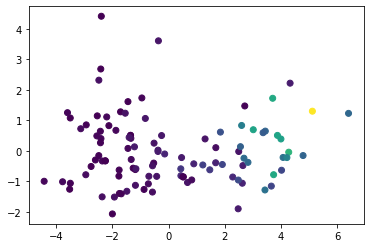

In [13]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df["Amount"]) 

In [18]:
model = ElasticNetCV()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)

search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

results = search.fit(X_train, y_train)

print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)



ValueError: Invalid parameter alpha for estimator ElasticNetCV(). Check the list of available parameters with `estimator.get_params().keys()`.

In [17]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ratios = np.arange(0, 1, 0.01)
alphas = [1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1, positive=True)
model.fit(X_train, y_train)
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\MrTur\anaconda3\lib\site-packages\sklearn\linea

alpha: 0.001000
l1_ratio_: 0.990000


In [383]:
model.score(X_test, y_test)

0.38244423545474293

Poor correlation between uni performance and grant amount, but non-zero

In [387]:
model.predict(X_test)

array([-1.02343219e+07,  1.71746242e+08, -3.52597362e+07,  8.86097657e+07,
        1.36761537e+08,  4.02540395e+07,  1.14795123e+08,  1.48550628e+08,
        9.02124352e+07,  2.01701657e+07,  2.71489908e+08,  2.24037535e+07,
        1.10033909e+08,  2.69681571e+06, -1.31976016e+07,  1.52364016e+08,
        1.42325170e+08,  4.57250130e+06, -3.89057178e+07,  5.32898633e+07,
       -1.90176359e+07,  5.19302575e+07,  2.36503865e+07,  6.51218859e+07,
        1.31769909e+07,  1.65089408e+08,  4.16295911e+07,  6.51451017e+07,
        4.06806009e+07,  1.09655996e+08,  7.20603938e+07, -1.49256895e+07,
       -1.11356958e+08,  1.61411857e+08,  5.25013125e+07])

In [ ]:
#scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#scores = np.absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

#model.fit(X_train, y_train)
#model.score(X_test, y_test)

# Least squares fit

In [67]:
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression(positive=False)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Coefficients: \n", reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-4.65148103e+05  6.02763771e+05 -3.35129593e+07  3.19039724e+07
  7.54544100e+07  2.60045786e+04  3.64659820e+04  3.63322942e+06
 -9.44310570e+06  6.11305134e+06 -4.46994567e+06]
Mean squared error: 6977915372585101.00
Coefficient of determination: 0.45


non negative fit

In [72]:
reg_nnls = LinearRegression(normalize=True, positive=True).fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("NNLS R2 score", r2_score_nnls)

Mean squared error: 6977915372585101.00
NNLS R2 score 0.4601189176502519


Text(0, 0.5, 'NNLS regression coefficients')

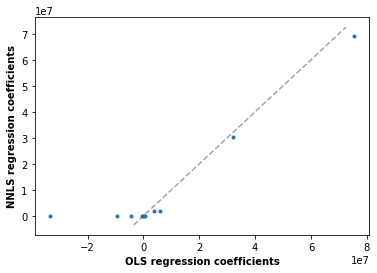

In [69]:
fig, ax = plt.subplots()
ax.plot(reg.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

Text(0, 0.5, 'actual grant values')

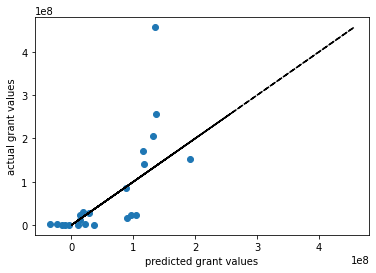

In [70]:
plt.scatter(y_pred_nnls, y_test)
plt.plot(y_test, y_test, "k", linestyle="--")
plt.xlabel("predicted grant values")
plt.ylabel("actual grant values")

# Data exploration

<AxesSubplot:>

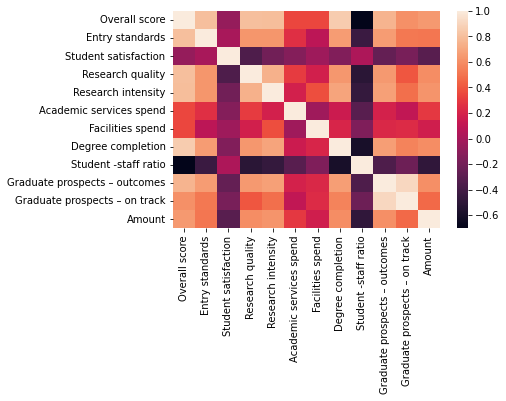

In [46]:
sns.heatmap(df.corr())

In [47]:
df.corr()

,Overall score,Entry standards,Student satisfaction,Research quality,Research intensity,Academic services spend,Facilities spend,Degree completion,Student -staff ratio,Graduate prospects – outcomes,Graduate prospects – on track,Amount
Overall score,1.000000,0.805706,-0.069461,0.801122,0.798217,0.341924,0.342191,0.859182,-0.705145,0.759987,0.609247,0.646745
Entry standards,0.805706,1.000000,0.003627,0.629653,0.631345,0.258154,0.083467,0.655838,-0.438731,0.660200,0.519360,0.507326
Student satisfaction,-0.069461,0.003627,1.000000,-0.353969,-0.211203,-0.135527,-0.036673,-0.145694,0.025404,-0.265380,-0.184645,-0.317296
Research quality,0.801122,0.629653,-0.353969,1.000000,0.746033,0.304753,0.178333,0.639692,-0.517316,0.640436,0.399149,0.594321
Research intensity,0.798217,0.631345,-0.211203,0.746033,1.000000,0.182702,0.368405,0.688500,-0.468737,0.670261,0.486691,0.620540
Academic services spend,0.341924,0.258154,-0.135527,0.304753,0.182702,1.000000,-0.028391,0.149726,-0.313703,0.192687,0.102136,0.290120
Facilities spend,0.342191,0.083467,-0.036673,0.178333,0.368405,-0.028391,1.000000,0.213954,-0.155949,0.227282,0.237185,0.173733
Degree completion,0.859182,0.655838,-0.145694,0.639692,0.688500,0.149726,0.213954,1.000000,-0.592753,0.662145,0.558479,0.598982
Student -staff ratio,-0.705145,-0.438731,0.025404,-0.517316,-0.468737,-0.313703,-0.155949,-0.592753,1.000000,-0.354975,-0.230112,-0.488297
Graduate prospects – outcomes,0.759987,0.660200,-0.265380,0.640436,0.670261,0.192687,0.227282,0.662145,-0.354975,1.000000,0.912822,0.603199


In [77]:
df2 = df

In [79]:
df2["Amount"] = np.log(df2["Amount"])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop(['Amount'], axis=1), df2['Amount'], test_size=0.2, random_state=42)

In [83]:
reg_nnls = LinearRegression(normalize=True, positive=True).fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("NNLS R2 score", r2_score_nnls)

Mean squared error: 9200407725617268.00
NNLS R2 score 0.7240967127274879


Text(0, 0.5, 'actual grant values')

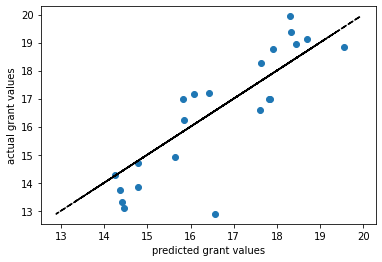

In [84]:
plt.scatter(y_pred_nnls, y_test)
plt.plot(y_test, y_test, "k", linestyle="--")
plt.xlabel("predicted grant values")
plt.ylabel("actual grant values")

In [94]:
pd.merge(np.exp(y_test), pd.Series(np.exp(y_pred_nnls)))

ValueError: Cannot merge a Series without a name

In [ ]:
UKRI_grant